In [5]:
import pandas as pd 



In [6]:
d1=pd.read_csv("pdata\hw2.1.csv",sep=";",index_col="id")
d2=pd.read_csv("pdata\hw2.2.csv",sep=";",index_col="id")

In [7]:
d1.head(1)

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001002,Male,No,No,5849.0,0.0,NaN,Y


In [8]:
pd.value_counts(d1["gender"])

Male    30
Name: gender, dtype: int64

In [9]:
d2.head(1)
pd.value_counts(d1["gender"])

Male    30
Name: gender, dtype: int64

In [10]:
d2.size

140

In [11]:
d1.size

210

In [14]:
df=pd.concat([d1,d2])
print(df.size,"\n",df.shape)

350 
 (50, 7)


In [15]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, LP0010050 to LP0010069
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       20 non-null     object 
 1   status       16 non-null     object 
 2   employed     19 non-null     object 
 3   income       18 non-null     float64
 4   extraIncome  18 non-null     float64
 5   expenses     17 non-null     float64
 6   buy          18 non-null     object 
dtypes: float64(3), object(4)
memory usage: 1.2+ KB


In [16]:
df.describe().head()

,income,extraIncome,expenses
count,43.000000,44.000000,44.000000
mean,17550.837209,8754.295455,3072.340909
std,49956.890344,18734.728869,10040.625006
min,564.000000,0.000000,66.000000
25%,3000.000000,700.000000,113.250000


In [17]:
df.select_dtypes("object").head()#****************************

,gender,status,employed,buy
id,,,,
LP001002,Male,No,No,Y
LP001003,Male,NaN,No,N
LP001004,Male,Yes,Yes,Y
LP001005,Male,Yes,No,Y
LP001006,Male,No,No,Y


In [18]:
df.select_dtypes("object").describe()


,gender,status,employed,buy
count,50,40,46,46
unique,1,2,2,2
top,Male,Yes,No,Y
freq,50,30,35,31


In [19]:
df.isnull().sum()

gender          0
status         10
employed        4
income          7
extraIncome     6
expenses        6
buy             4
dtype: int64

In [20]:
df.duplicated().sum()#
df.drop_duplicates()

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001002,Male,No,No,5849.0,0.0,NaN,Y
LP001003,Male,NaN,No,4583.0,1508.0,1111.0,N
LP001004,Male,Yes,Yes,3000.0,0.0,66.0,Y
LP001005,Male,Yes,No,2583.0,2358.0,120.0,Y
LP001006,Male,No,No,NaN,0.0,141.0,Y
LP001007,Male,Yes,Yes,5417.0,4196.0,267.0,Y
LP001008,Male,Yes,No,2333.0,NaN,95.0,Y
LP001009,Male,NaN,NaN,3036.0,2504.0,435.0,NaN
LP001010,Male,Yes,No,4006.0,1526.0,168.0,Y


In [21]:
df["income"].unique()

array([  5849.,   4583.,   3000.,   2583.,     nan,   5417.,   2333.,
         3036.,   4006.,   3200.,   2500.,   3073.,  45343.,   4444.,
        56334.,    564.,  34332.,  43534., 324324.,   3434.,  12841.,
         5676.,  21212.,  23243.,   6556.,   2232.,  32232.])

In [22]:
df["status"]=df["status"].fillna("yes")

In [23]:
df["income"]=df["income"].fillna(df["income"].mean())

In [24]:
pd.value_counts(df["employed"])

No     35
Yes    11
Name: employed, dtype: int64

In [25]:
df["employed"]=df["employed"].fillna("Yes")

In [26]:
df=df.dropna()
df.size

259

In [27]:
df.isnull().sum()

gender         0
status         0
employed       0
income         0
extraIncome    0
expenses       0
buy            0
dtype: int64

In [28]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Assuming you have a DataFrame called 'df' with features and a target column 'target'

# Separate the features and target
X = df.drop('buy', axis=1)
y = df['buy']

# Calculate the MI scores for each feature
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame to store the MI scores
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display the MI scores
print(mi_df)


ValueError: could not convert string to float: 'Male'

In [29]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy
id,,,,,,,
LP001003,Male,yes,No,4583.000000,1508.0,1111.0,N
LP001004,Male,Yes,Yes,3000.000000,0.0,66.0,Y
LP001005,Male,Yes,No,2583.000000,2358.0,120.0,Y
LP001006,Male,No,No,17550.837209,0.0,141.0,Y
LP001007,Male,Yes,Yes,5417.000000,4196.0,267.0,Y


In [30]:
x=df.iloc[[5,8,15],0:4]
x

,gender,status,employed,income
id,,,,
LP001010,Male,Yes,No,4006.0
LP001013,Male,yes,Yes,2500.0
LP001024,Male,Yes,No,4006.0


In [31]:
df["total_income"]=df["income"]+df["extraIncome"]
df.head()


,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001003,Male,yes,No,4583.000000,1508.0,1111.0,N,6091.000000
LP001004,Male,Yes,Yes,3000.000000,0.0,66.0,Y,3000.000000
LP001005,Male,Yes,No,2583.000000,2358.0,120.0,Y,4941.000000
LP001006,Male,No,No,17550.837209,0.0,141.0,Y,17550.837209
LP001007,Male,Yes,Yes,5417.000000,4196.0,267.0,Y,9613.000000


In [32]:
df[(df["status"] == "yes") & (df["employed"] == "Yes")]


,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001013,Male,yes,Yes,2500.0,1840.0,109.0,Y,4340.0
LP001027,Male,yes,Yes,564.0,6792.0,109.0,Y,7356.0
LP0010064,Male,yes,Yes,564.0,6792.0,109.0,Y,7356.0


In [33]:
df= df.sort_values(by="total_income",ascending=False)
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


In [34]:
corr=df.corr()#***********************
corr

,income,extraIncome,expenses,total_income
income,1.000000,0.009398,-0.079068,0.585588
extraIncome,0.009398,1.000000,-0.065387,0.816076
expenses,-0.079068,-0.065387,1.000000,-0.098704
total_income,0.585588,0.816076,-0.098704,1.000000


<AxesSubplot:>

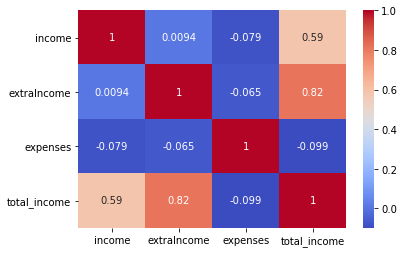

In [35]:
import seaborn as sns 
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [36]:
df.skew()#****************

income          1.789787
extraIncome     3.599231
expenses        4.446146
total_income    2.090748
dtype: float64

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'extraIncome'}>],
       [<AxesSubplot:title={'center':'expenses'}>,
        <AxesSubplot:title={'center':'total_income'}>]], dtype=object)

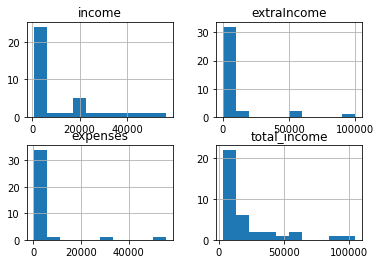

In [37]:
df.hist() # all are postitave skew  

In [38]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


<AxesSubplot:xlabel='id'>

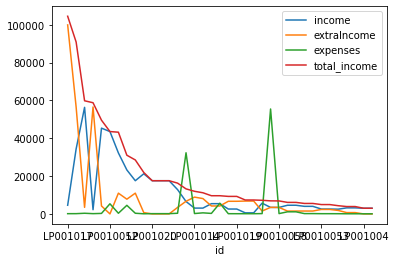

In [39]:
df.plot()

<AxesSubplot:>

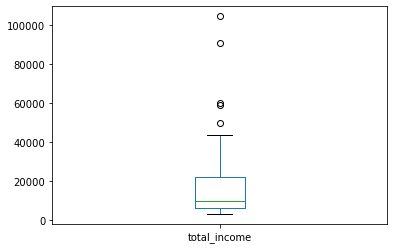

In [40]:
df["total_income"].plot(kind="box")

In [41]:
q1=df["income"].quantile(0.25)
q3=df["income"].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print(lower,upper)

-18826.25581395349 39377.09302325582


In [42]:
df[~df["income"].between(lower,upper)]# all the outliers

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0
LP0010052,Male,Yes,Yes,43534.0,0.0,5345.0,Y,43534.0


<AxesSubplot:xlabel='employed,buy'>

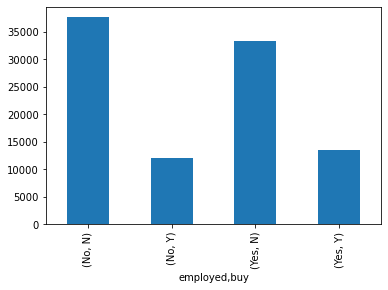

In [43]:
x=df.groupby(["employed","buy"]).mean()["total_income"]
x.plot(kind="bar")#the total income for not employed and didnt buy is the highest

In [44]:
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income
id,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0
LP001025,Male,Yes,Yes,56334.0,3467.0,349.0,N,59801.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0
LP001021,Male,No,Yes,45343.0,4196.0,267.0,Y,49539.0


# unbalanced data

In [45]:
pd.value_counts(df["employed"])

No     24
Yes    13
Name: employed, dtype: int64

In [46]:
from sklearn.utils import resample 
upsampled_df =resample(df[df.employed=="Yes"],n_samples=len(df[df.employed=="No"]),replace=True,random_state=52)
upsampled_df.shape

(24, 8)

In [47]:
x=df[df["employed"]=="No"]
df=pd.concat([x,upsampled_df])
pd.value_counts(df["employed"])

No     24
Yes    24
Name: employed, dtype: int64

# PCA/binning / encoding / 

In [48]:
 #binning 
import pandas as pd

# Define the income categories and corresponding bin boundaries
income_bins = [0, 30000, 60000, float('inf')]
income_labels = ['low', 'mid', 'high']

# Apply the categorization to the 'income' column
df['income_category'] = pd.cut(df['total_income'], bins=income_bins, labels=income_labels)
df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income,income_category
id,,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0,high
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0,high
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0,mid
LP0010069,Male,Yes,No,32232.0,10968.0,349.0,N,43200.0,mid
LP0010065,Male,Yes,No,23243.0,7786.0,4544.0,Y,31029.0,mid


In [49]:
df.value_counts(df["income_category"])

income_category
low     37
mid      9
high     2
dtype: int64

In [50]:
# ordenal encoding 
from sklearn.preprocessing import OrdinalEncoder
# Define the categorical columns to encode

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder(categories=[["low","mid","high"]])

# Fit and transform the selected columns
df["income_category"] = encoder.fit_transform(df[["income_category"]])#[[]]



In [51]:

df.head()

,gender,status,employed,income,extraIncome,expenses,buy,total_income,income_category
id,,,,,,,,,
LP001017,Male,yes,No,4583.0,99905.0,128.0,N,104488.0,2.0
LP001020,Male,Yes,No,34332.0,56543.0,141.0,N,90875.0,2.0
LP0010068,Male,Yes,No,2232.0,56543.0,141.0,N,58775.0,1.0
LP0010069,Male,Yes,No,32232.0,10968.0,349.0,N,43200.0,1.0
LP0010065,Male,Yes,No,23243.0,7786.0,4544.0,Y,31029.0,1.0


In [52]:
df=pd.get_dummies(df)
df.head()

,income,extraIncome,expenses,total_income,income_category,gender_Male,status_No,status_Yes,status_yes,employed_No,employed_Yes,buy_N,buy_Y
id,,,,,,,,,,,,,
LP001017,4583.0,99905.0,128.0,104488.0,2.0,1,0,0,1,1,0,1,0
LP001020,34332.0,56543.0,141.0,90875.0,2.0,1,0,1,0,1,0,1,0
LP0010068,2232.0,56543.0,141.0,58775.0,1.0,1,0,1,0,1,0,1,0
LP0010069,32232.0,10968.0,349.0,43200.0,1.0,1,0,1,0,1,0,1,0
LP0010065,23243.0,7786.0,4544.0,31029.0,1.0,1,0,1,0,1,0,0,1


In [53]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=2)  # Specify the number of components to keep

# Fit and transform the data
pca_result = pca.fit_transform(df)

# Access the transformed data and explained variance ratio
transformed_data = pca_result[:, 0]  # Transformed data with reduced dimensions
explained_variance_ratio = pca.explained_variance_ratio_  # Explained variance ratio of each component
print(explained_variance_ratio)

[0.67232142 0.22176079]


In [54]:
print(transformed_data)

[105858.19405548  87055.0018453   48794.90943367  27510.42516596
  12572.50495321  10011.90038765   1543.05381703  -3700.73045442
  -3700.73045442  -3700.73045442  -5029.32428323 -10308.05265828
  -9838.45488771 -10838.06810016 -13184.5702037  -13184.05066463
 -15946.40881958 -17326.11755934 -17326.11755934 -17936.88714664
 -17936.88714664 -18589.08422704 -18589.08422704 -19925.50643863
 -15446.48429626 -21039.59038232 -21039.59038232 -19381.82723891
 -15446.48429626 -21039.59038232 -19381.82723891  46851.41520768
 -15446.48429626 -19925.5064423  -21039.59038232 -21039.59038232
 -19925.5064423  -12919.76319962 -12919.76319962  34668.16358014
 -12919.76319962  34668.16358014 -15446.48429626  34668.16358014
  46851.41520768 -21039.59038232  46851.41520768 -15446.48429626]


# NOrmalization (min max, z score )


In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms=MinMaxScaler()
mms.fit_transform(df[["income","total_income"]])

array([[0.07206383, 1.        ],
       [0.60548682, 0.86586592],
       [0.02990855, 0.54957236],
       [0.56783217, 0.39610594],
       [0.40665232, 0.27618044],
       [0.30458736, 0.25144684],
       [0.37023489, 0.18634715],
       [0.30458736, 0.14337495],
       [0.30458736, 0.14337495],
       [0.30458736, 0.14337495],
       [0.22013627, 0.13080364],
       [0.10744128, 0.10082965],
       [0.04498834, 0.08829615],
       [0.04498834, 0.08059081],
       [0.03620226, 0.06168217],
       [0.03620226, 0.06168217],
       [0.09166218, 0.04140391],
       [0.07206383, 0.0304568 ],
       [0.07206383, 0.0304568 ],
       [0.06171777, 0.02494876],
       [0.06171777, 0.02494876],
       [0.03620226, 0.01912541],
       [0.03620226, 0.01912541],
       [0.04726555, 0.00886804],
       [0.        , 0.04292133],
       [0.0436794 , 0.        ],
       [0.0436794 , 0.        ],
       [0.05146136, 0.03843804],
       [0.        , 0.04292133],
       [0.0436794 , 0.        ],
       [0.

In [60]:
ss=StandardScaler()
ss.fit_transform(df[["income","total_income"]])

array([[-0.48636806,  3.5050366 ],
       [ 1.31590522,  2.93748143],
       [-0.62879787,  1.59916358],
       [ 1.18868165,  0.94980843],
       [ 0.6441042 ,  0.44237333],
       [ 0.29925789,  0.33771926],
       [ 0.52106084,  0.06226605],
       [ 0.29925789, -0.11956018],
       [ 0.29925789, -0.11956018],
       [ 0.29925789, -0.11956018],
       [ 0.01392347, -0.17275257],
       [-0.36683849, -0.29958008],
       [-0.57784786, -0.35261249],
       [-0.57784786, -0.38521574],
       [-0.60753336, -0.46522297],
       [-0.60753336, -0.46522297],
       [-0.42015122, -0.5510254 ],
       [-0.48636806, -0.59734538],
       [-0.48636806, -0.59734538],
       [-0.52132425, -0.62065129],
       [-0.52132425, -0.62065129],
       [-0.60753336, -0.64529134],
       [-0.60753336, -0.64529134],
       [-0.57015386, -0.68869287],
       [-0.72984973, -0.54460481],
       [-0.58227039, -0.7262158 ],
       [-0.58227039, -0.7262158 ],
       [-0.55597752, -0.56357474],
       [-0.72984973,

# transofrmation (sqr,log,exp) to make it normal dist

<AxesSubplot:>

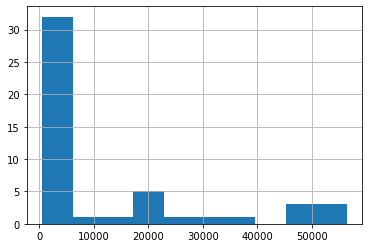

In [63]:
df["income"].hist()

<AxesSubplot:>

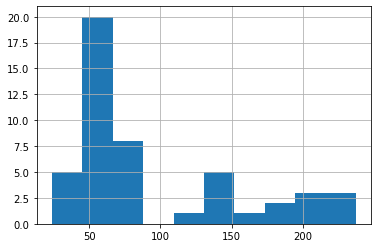

In [65]:
import  numpy as np
np.sqrt(df["income"]).hist()

<AxesSubplot:>

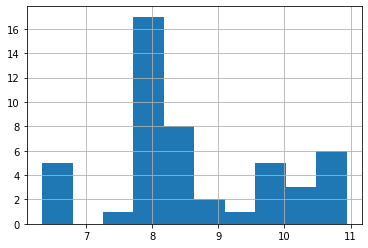

In [66]:
np.log(df["income"]).hist()

In [ ]:
np.exp(df["income"])